# COP508 Machine Learning CW


## Table of Contents
1. [Data Ingestion](#data-ingestion)
    1. [Importing the Libraries](#importing_libraries)
    2. [Importing the Dataset](#importing_dataset)
    3. [Splitting Dataset into Train & Test set](#dataset_split)
    4. [Visualising Five Images from the Dataset](#visualize_images)

2. [Data Preprocessing](#data_preprocessing)
    1. [Grayscale Conversion](#grayscale)
    2. [Normalization](#normalization)
    3. [Gausian Blur](#blur)
    4. [Image Rotation](#rotate)
    5. [One Hot Encoding](#encoding)

3. [Model Learning](#model_learning)
    1. [Convolutional Neural Network (CNN) Models](#cnn_models)
    2. [Base CNN Model](#base_cnn_model)
    3. [VGG16 CNN Model](#vgg16_cnn_model)
    4. [ResNet50 CNN Model](#resnet50_cnn_model)
    5. [Best CNN Model](#best_cnn_model)

4. [Model Evaluation](#model_evaluation)
    1. [Visualization of Base CNN Model](#visualization_base_cnn_model)
    2. [Visualization of VGG16 CNN Model](#visualization_vgg16_cnn_model)
    3. [Visualization of ResNet50 CNN Model](#visualization_resnet50_cnn_model)
    4. [Visualization of Best CNN Model](#visualization_best_cnn_model)

5. [Model Prediction](#model_prediction)
    1. [Prediction of Best CNN Model](#prediction_best_cnn_model)
    
    


## <a name="data-ingestion">Data Ingestion</a>


### <a name="import_libraries">Importing the Libraries</a>


In [ ]:
import os
import numpy as np
import pickle
import requests
import matplotlib.pyplot as plt
import cv2
import wget
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from sklearn.metrics import accuracy_score
from matplotlib import image
from scipy import ndimage
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from keras.utils import np_utils
from tensorflow.keras import optimizers
from keras.models import Sequential


### <a name="importing_dataset">Importing the Dataset</a>


In [ ]:
path_to_check = os.path.join('', 'image_recognition_dataset.pth')
data_path = path_to_check


def load_coursework_data():
    if not os.path.exists(path_to_check):
        print("Cannot find the dataset on local !")
        print("Downloading the dataset from cloud, it may take several mintues.")
        url = 'https://www.dropbox.com/s/j05hyf667ikzu4s/image_recognition_dataset.pth?dl=1'
        filename = wget.download(url)
        data_path = os.path.join('', filename)
    else:
        print("Data found on local {:s}".format(path_to_check))
        data_path = path_to_check

    data = pickle.load(open(data_path, 'rb'))
    train_imgs, train_labels, test_imgs, test_labels = data.values()
    return train_imgs, train_labels, test_imgs, test_labels


### <a name="dataset_split">Splitting the Dataset into the Train & Test set</a>


In [ ]:
train_imgs, train_labels, test_imgs, test_labels = load_coursework_data()


Cannot find the dataset on local !


### <a name="display_dataset">Displaying Dataset Information</a>


In [ ]:
cls_train = len(np.unique(train_labels))
print("Total number of image classes : {:d}".format(cls_train))
print("Shape of training set", train_imgs.shape)
print("Training image count: ", train_imgs.shape[0])
print("Test image count: ", test_imgs.shape[0])


Total number of image classes : 8
Shape of training set (40000, 32, 32, 3)
Training image count:  40000
Test image count:  8000


### <a name="visualize_images">Visualising Five Images from the Dataset</a>


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


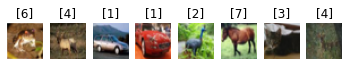

In [ ]:
def plot_trained_images() -> None:
    for i in range(8):
        plt.subplot(1, 8, i+1)
        imgData = np.array(train_imgs[i])
        plt.title(train_labels[i])
        plt.imshow(imgData)
        plt.axis('off')


plot_trained_images()


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


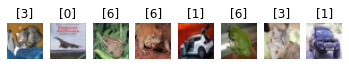

In [ ]:
def plot_test_images() -> None:
    for i in range(8):
        plt.subplot(1, 8, i+1)
        imgData = np.array(test_imgs[i])
        plt.title(test_labels[i])
        plt.imshow(imgData)
        plt.axis('off')


plot_test_images()


## <a name="data_preprocessing">Data Preprocessing</a>


### <a name="grayscale">Grayscale Conversion</a>


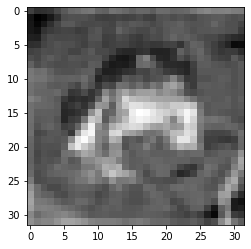

In [ ]:
# Conversion of colour image to grayscale. Code was tried and tested but not used for models due to poor performance.
grayscale_train_img = [cv2.cvtColor(
    one_img, cv2.COLOR_BGR2GRAY) for one_img in train_imgs]
grayscale_test_img = [cv2.cvtColor(
    one_img, cv2.COLOR_BGR2GRAY) for one_img in test_imgs]
plt.imshow(grayscale_train_img[0], cmap='gray')


### <a name="normalization">Normalization</a>


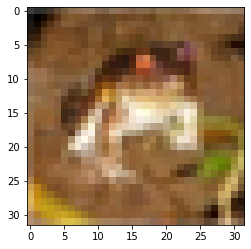

In [ ]:
# Normalizing all images in the dataset in the range of 0 and 1.
normalized_train_img = [one_img/255.0 for one_img in train_imgs]
normalized_test_img = [one_img/255.0 for one_img in test_imgs]
plt.imshow(normalized_train_img[0])


### <a name="blur">Gaussian Blur</a>


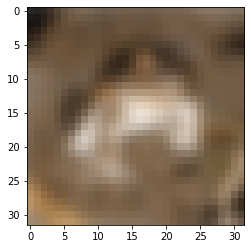

In [ ]:
# Blurring images of sigma 1. Code was tried and tested but not used for models due to poor performance.
blurred_train_img = [ndimage.gaussian_filter(
    train_blur_imgs, sigma=1) for train_blur_imgs in normalized_train_img]
blurred_test_img = [ndimage.gaussian_filter(
    test_blur_imgs, sigma=1) for test_blur_imgs in normalized_test_img]
plt.imshow(blurred_train_img[0])


### <a name="rotation">Image Rotation</a>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


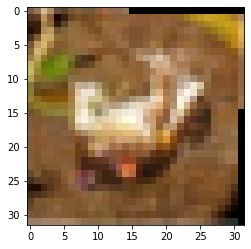

In [ ]:
# Rotation of images to 180 degrees through the use of a list comprehension.
rotated_train_img = np.array([ndimage.rotate(
    train_rotate_imgs, angle=180) for train_rotate_imgs in normalized_train_img])
rotated_test_img = np.array([ndimage.rotate(
    test_rotate_imgs, angle=180) for test_rotate_imgs in normalized_test_img])
plt.imshow(rotated_train_img[0])


### <a name="encoding">One-Hot Encoding</a>


In [ ]:
# Reshaping of rotated_train_img and rotated_test_img which are numpy arrays.
rotated_train_img = rotated_train_img.reshape(
    rotated_train_img.shape[0], 32, 32, 3)
rotated_test_img = rotated_test_img.reshape(
    rotated_test_img.shape[0], 32, 32, 3)

# rotated_train_img = rotated_train_img.astype('float32')
# rotated_test_img = rotated_test_img.astype('float32')

# one-hot encoding - Used to help in preprocessing categorical features of the images.
no_of_classes = 8
print("Shape of training split before one-hot encoded: ", train_labels.shape)
Y_train = np_utils.to_categorical(train_labels, no_of_classes)
Y_test = np_utils.to_categorical(test_labels, no_of_classes)
print("Shape of training split after one-hot encoded: ", Y_train.shape)


Shape of training split before one-hot encoded:  (40000, 1)
Shape of training split after one-hot encoded:  (40000, 8)


## <a name="model_learning">Model Learning</a>


### <a name="cnn_models">Convolutional Neural Network (CNN) Models</a>


#### <a name="base_cnn_model">Base CNN Model</a>


In [ ]:
# Reference: https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/

# To prevent any memory build up from old models or layers.
keras.backend.clear_session()
np.random.seed(15)
tf.random.set_seed(15)

# Creating an early stopping function to monitor loss while keeping the best results.
early_callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss', restore_best_weights=True, patience=0)

# Initializing Sequential model, creating linear stack of model layers.
model = Sequential()

# Adding 3 convolutional layers with max pooling and dropout functions.
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),
                 padding='same', input_shape=(32, 32, 3), activation='relu'))

model.add(Conv2D(64, kernel_size=(3, 3), strides=(
    1, 1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), strides=(
    1, 1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening convolutional layer output.
model.add(Flatten())

# Adding 2 hidden layers.
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.75))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.55))

# Final output layer.
model.add(Dense(8, activation='softmax'))

# Compilation of sequential model with suitable parameters.
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy', 'AUC'], optimizer='adam')

# Training model for 20 epochs
final_model = model.fit(np.array(rotated_train_img), np.array(Y_train), batch_size=128, epochs=20, callbacks=[
                        early_callback], validation_data=(np.array(rotated_test_img), np.array(Y_test)))


#### <a name="vgg16_cnn_model">VGG16 CNN Model</a>


In [ ]:
# Reference: https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c

# Creating an early stopping function to monitor validation accuracy while keeping the best results.
early_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

# Initializing Sequential model, creating linear stack of model layers.
model1 = Sequential()

# Adding 10 convolutional layers with max pooling and dropout functions.
model1.add(Conv2D(32, input_shape=(32, 32, 3), kernel_size=(
    3, 3), strides=(1, 1), padding="same", activation="relu"))

model1.add(Conv2D(64, kernel_size=(3, 3), strides=(
    1, 1), padding="same", activation="relu"))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(128, kernel_size=(3, 3), strides=(
    1, 1), padding="same", activation="relu"))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(256, kernel_size=(3, 3), strides=(
    1, 1), padding="same", activation="relu"))
model1.add(Conv2D(256, kernel_size=(3, 3), strides=(
    1, 1), padding="same", activation="relu"))
model1.add(Conv2D(256, kernel_size=(3, 3), strides=(
    1, 1), padding="same", activation="relu"))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(512, kernel_size=(3, 3), strides=(
    1, 1), padding="same", activation="relu"))
model1.add(Conv2D(512, kernel_size=(3, 3), strides=(
    1, 1), padding="same", activation="relu"))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(512, kernel_size=(3, 3), strides=(
    1, 1), padding="same", activation="relu"))
model1.add(Conv2D(512, kernel_size=(3, 3), strides=(
    1, 1), padding="same", activation="relu"))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

# Flattening convolutional layer output.
model1.add(Flatten())

# Adding 2 hidden layers.
model1.add(Dense(4096, activation="relu"))
model1.add(Dropout(0.5))
model1.add(Dense(4096, activation="relu"))
model1.add(Dropout(0.5))

# Final output layer.
model1.add(Dense(8, activation="softmax"))

# Compilation of sequential model with suitable parameters.
model1.compile(optimizer='adam', loss='categorical_crossentropy',
               metrics=['accuracy', 'AUC'])

# Training model for 10 epochs.
vgg_model = model1.fit(rotated_train_img, Y_train, batch_size=128, epochs=10,
                       validation_data=(rotated_test_img, Y_test), callbacks=[early_callback])


#### <a name="resnet50_cnn_model">ResNet-50 CNN Model</a>


In [ ]:
# Reference: https://github.com/y33-j3T/Coursera-Deep-Learning/blob/master/Advanced%20Computer%20Vision%20with%20TensorFlow/Week%201%20-%20Introduction%20to%20Computer%20Vision/Copy%20of%20C3_W1_Lab_2_Transfer_Learning_CIFAR_10.ipynb

"""
Pretrained model on imagenet weights with respective input shape.
"""


def feature_extractor(inputs):

    feature_extractor = tf.keras.applications.resnet.ResNet50(input_shape=(32, 32, 3),
                                                              include_top=False,
                                                              weights='imagenet')(inputs)
    return feature_extractor


"""
Initialize hidden layer and output layer with softmax activation function.
"""


def classifier(inputs):
    x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(1024, activation="relu")(x)
    x = tf.keras.layers.Dense(512, activation="relu")(x)
    x = tf.keras.layers.Dense(8, activation="softmax",
                              name="classification")(x)
    return x


"""
Upsampling in order to transform the images with the input size as (224, 224).
"""


def final_model(inputs):

    resize = tf.keras.layers.UpSampling2D(size=(1, 1))(inputs)

    resnet_feature_extractor = feature_extractor(resize)
    classification_output = classifier(resnet_feature_extractor)

    return classification_output


"""
Define the ML model and start compilation.
Stochastic Gradient Descent is the optimizer
Categorical crossentropy for the loss function.
"""


def define_compile_model():
    inputs = tf.keras.layers.Input(shape=(32, 32, 3))

    classification_output = final_model(inputs)
    model = tf.keras.Model(inputs=inputs, outputs=classification_output)

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


model = define_compile_model()

# Provide model summary.
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 32, 32, 3)         0         
_________________________________________________________________
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800

In [ ]:
# Training model for 10 epochs
model.fit(rotated_train_img, Y_train, epochs=10,
          validation_data=(rotated_test_img, Y_test))


Epoch 1/10
1250/1250 [==============================] - 26s 19ms/step - loss: 1.4135 - accuracy: 0.4962 - val_loss: 0.8872 - val_accuracy: 0.6991
Epoch 2/10
1250/1250 [==============================] - 23s 19ms/step - loss: 0.7568 - accuracy: 0.7345 - val_loss: 0.6585 - val_accuracy: 0.7781
Epoch 3/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.5570 - accuracy: 0.8041 - val_loss: 0.7812 - val_accuracy: 0.7352
Epoch 4/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.4363 - accuracy: 0.8474 - val_loss: 0.6225 - val_accuracy: 0.7935
Epoch 5/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.3456 - accuracy: 0.8779 - val_loss: 0.7298 - val_accuracy: 0.7657
Epoch 6/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.2607 - accuracy: 0.9087 - val_loss: 0.7110 - val_accuracy: 0.7779
Epoch 7/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.2121 - accuracy: 0.9255 - val_loss: 0.7273 -

KeyboardInterrupt: 

#### <a name="best_cnn_model">Best CNN Model</a>


In [ ]:
# To prevent any memory build up from old models or layers.
keras.backend.clear_session()
np.random.seed(15)
tf.random.set_seed(15)

# Creating an early stopping function to monitor loss while keeping the best results.
early_callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss', restore_best_weights=True, patience=10)

# Initializing Sequential model, creating linear stack of model layers.
model2 = Sequential()

# Adding 6 convolutional layers with max pooling and dropout functions.
model2.add(Conv2D(32, input_shape=(32, 32, 3), kernel_size=(
    3, 3), strides=(1, 1), padding="same", activation="relu"))

model2.add(Conv2D(64, kernel_size=(3, 3), strides=(
    1, 1), padding="same", activation="relu"))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128, kernel_size=(3, 3), strides=(
    1, 1), padding="same", activation="relu"))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(256, kernel_size=(3, 3), strides=(
    1, 1), padding="same", activation="relu"))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(512, kernel_size=(3, 3), strides=(
    1, 1), padding="same", activation="relu"))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(512, kernel_size=(3, 3), strides=(
    1, 1), padding="same", activation="relu"))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

# Flattening convolutional layer output.
model2.add(Flatten())

# Adding 2 hidden layers.
model2.add(Dense(500, activation="relu"))
model2.add(Dropout(0.75))
model2.add(Dense(200, activation="relu"))
model2.add(Dropout(0.3))

# Final output layer.
model2.add(Dense(8, activation="softmax"))

# Compilation of sequential model with suitable parameters.
model2.compile(optimizer='adam', loss='categorical_crossentropy',
               metrics=['accuracy'])

# Training model for 25 epochs
hist = model2.fit(rotated_train_img, Y_train, batch_size=128, callbacks=[
                  early_callback], epochs=25, validation_data=(rotated_test_img, Y_test))


Epoch 1/25
313/313 [==============================] - 4s 13ms/step - loss: 1.9911 - accuracy: 0.1835 - val_loss: 1.5644 - val_accuracy: 0.3902
Epoch 2/25
313/313 [==============================] - 4s 13ms/step - loss: 1.5009 - accuracy: 0.4309 - val_loss: 1.2025 - val_accuracy: 0.5587
Epoch 3/25
313/313 [==============================] - 4s 13ms/step - loss: 1.2365 - accuracy: 0.5468 - val_loss: 1.0702 - val_accuracy: 0.6166
Epoch 4/25
313/313 [==============================] - 4s 14ms/step - loss: 1.0817 - accuracy: 0.6071 - val_loss: 0.9983 - val_accuracy: 0.6415
Epoch 5/25
313/313 [==============================] - 4s 13ms/step - loss: 1.0032 - accuracy: 0.6379 - val_loss: 0.8751 - val_accuracy: 0.6898
Epoch 6/25
313/313 [==============================] - 4s 14ms/step - loss: 0.9168 - accuracy: 0.6754 - val_loss: 0.8914 - val_accuracy: 0.6877
Epoch 7/25
313/313 [==============================] - 4s 13ms/step - loss: 0.8817 - accuracy: 0.6905 - val_loss: 0.8361 - val_accuracy: 0.7111

## <a name="model_evaluation">Model Evaluation</a>


### <a name="visualization_base_cnn_model">Visualization of Base CNN Model</a>


250/250 - 0s - loss: 0.6661 - accuracy: 0.7664
Test accuracy on test data split: 0.7663750052452087


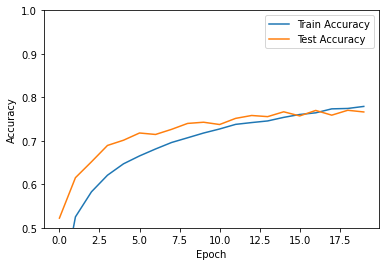

In [ ]:
# Create line graph for displaying test and train accuracy.
plt.plot(final_model.history['accuracy'], label='Train Accuracy')
plt.plot(final_model.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='best')

# Calculate the test accuracy.
test_loss1, test_acc1, *_ = model.evaluate(rotated_test_img, Y_test, verbose=2)
print('Test accuracy on test data split:', test_acc1)


### <a name="viaulization_vgg16_cnn_model">Visualization of VGG16 CNN Model</a>


In [ ]:
# Create line graph for displaying test and train accuracy.
plt.plot(vgg_model.history['accuracy'], label='Train Accuracy')
plt.plot(vgg_model.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='best')

# Calculate the test accuracy.
test_loss2, test_acc2, *_ = model.evaluate(rotated_test_img, Y_test)
print('Test accuracy on test data split:', test_acc2)


### <a name="visualization_best_cnn_model">Visualization of Best Model</a>


250/250 [==============================] - 1s 3ms/step - loss: 0.6553 - accuracy: 0.7715
Test accuracy on test data split: 0.7714999914169312


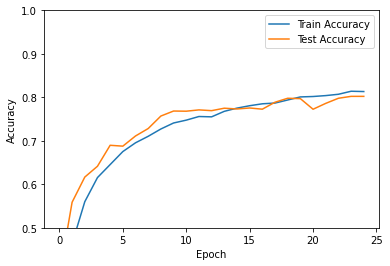

In [ ]:
# Create line graph for displaying test and train accuracy.
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='best')

# Calculate the test accuracy.
test_loss3, test_acc3, *_ = model.evaluate(rotated_test_img, Y_test)
print('Test accuracy on test data split:', test_acc3)


## <a name="model_prediction">Model Prediction</a>


### <a name="prediction_best_cnn_model">Prediction of Best CNN Model</a>


In [ ]:
# Refernce: https://github.com/y33-j3T/Coursera-Deep-Learning/blob/master/Advanced%20Computer%20Vision%20with%20TensorFlow/Week%201%20-%20Introduction%20to%20Computer%20Vision/Copy%20of%20C3_W1_Lab_2_Transfer_Learning_CIFAR_10.ipynb

# Define classes/objects.
classes = ['airplane', 'automobile', 'bird',
           'cat', 'deer', 'dog', 'frog', 'horse']

"""
Define function to plot images.
Displays images with actual and predicted labels.
"""


def display_predictions(predict_test_imgs, preds, labels, title):
    n_of_classes = 8

    indexes = np.random.choice(len(preds), size=n_of_classes)
    n_predict_test_imgs = predict_test_imgs[indexes]
    n_preds = preds[indexes]
    n_preds = n_preds.reshape((n_of_classes,))
    n_labels = labels[indexes]

    fig = plt.figure(figsize=(20, 4))
    plt.title(title)
    plt.yticks([])
    plt.xticks([])

# Display 8 random test images along with their actual and predicted labels.
    for z in range(8):
        ax = fig.add_subplot(1, 10, i+1)
        class_index = n_preds[z]
        pred_actual_labels = 'Predicted class:' + \
            classes[class_index] + '\n' + \
            'Actual class:' + classes[n_labels[z]]
        plt.xlabel(pred_actual_labels)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(n_predict_test_imgs[z])


TypeError: only integer scalar arrays can be converted to a scalar index

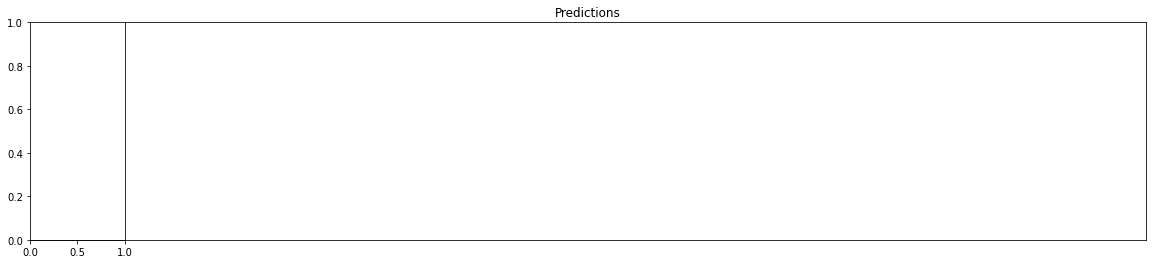

In [ ]:
# Using the trained model to predict the test images.
pred_chance = model.predict(rotated_test_img, batch_size=128)
pred_chance = np.argmax(pred_chance, axis=1)

# Utilizing display_predictions function to display images.
display_predictions(
    rotated_test_img, pred_chance, Y_test, 'Predictions')